<a href="https://colab.research.google.com/github/Bigmee/heart-disease-prediction-model/blob/main/Heart_Diseases_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart disease prediction model**

This model was created using a dataset from kaggle, the steps in creating this model includes
**Section** **A**
1.   importing pandas
2.   importing the Dataset
3.   taking care of missing values and checking for duplicates
4.   seperating categorical values from the numerical values
5. encoding categorical data and avoiding dummy variable trap 
6.  Feature scaling using standardScaler from sklearn
7. splitting the dataset into training and testing datasets
8. logistic regression and perform one prediction 
9. checking the prediction accuracy 
a. Support Vector Classifier (SVC)
b. KNeighbors Classifier
**Section B**
 Non-Linear ML Algorithms
1. seperating dependent and independent variables
2. performing Train-Test split
3. Training the model
a. Decision Tree Classifier
b. Random Forest Classifier
c. Gradient Boosting Classifier

Section c
1. Comparing the accuracy scores of the  different models using Bar Chart
2. Visualising the data frame
3. Training the entire Dataset using the model with the best accuracy (Random Forest)
4. Prediction on New Data
5. Saving Model using Joblib
**By Eze Chukwuemeka Joseph
chukwuemeka.j.eze@gmail.com**

# importing pandas

In [ ]:
import pandas as pd 

# importing the Dataset

In [ ]:
data = pd.read_csv('heart.csv')

# **Taking Care of Missing Values**

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Checking for duplicate Values**

In [ ]:
data_dup = data.duplicated().any()

In [ ]:
data_dup

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data_dup = data.duplicated().any()

In [ ]:
data_dup

False

# Data Processing: seperating categorical values from numerical values 

In [ ]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [ ]:
cate_val 

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Data Preprocessing

encoding Categorical Data

In [ ]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
data['cp'].unique()

array([0, 1, 2, 3])

avoiding dummy variable trap

In [ ]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val, drop_first=True)

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


#feature scaling

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# **Splitting The Dataset into the Training Set And Test set**

seperating dependent variables from dependent variables

In [ ]:
x = data.drop('target', axis=1)

In [ ]:
x

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
y = data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [ ]:
x_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# Logistic Regression 

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

performing one predicition 

In [ ]:
y_pred1  = log.predict(x_test)

# checking our model accuracy 

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred1)

0.7868852459016393

Support Vector Classifier (SVC)

In [ ]:
from sklearn import svm

In [ ]:
#creating an instance of the model
svm = svm.SVC()

In [ ]:
svm.fit(x_train, y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred2)

0.8032786885245902

KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.7377049180327869

In [ ]:
score = []
for k in range(1, 40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test, y_pred))

In [ ]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8032786885245902

# Non-Linear ML Algorithms 

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
#removind duplicates
data = data.drop_duplicates()

In [ ]:
data.shape

(302, 14)

seperating dependent and independent variables

In [ ]:
x = data.drop('target',axis=1)
y= data['target']

performing Train-Test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Decsion Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#creating an instance of Decision Tree Classifier
dt = DecisionTreeClassifier()

In [ ]:
#training the model
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#performing predicition on unseen sample 
y_pred4 = dt.predict(x_test)

In [ ]:
#finding the accuracy score
accuracy_score(y_test,y_pred4)

0.6885245901639344

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#creating instance of the classifier
rf = RandomForestClassifier()

In [ ]:
#training our models
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#performing predicition
y_pred5 = rf.predict(x_test)

In [ ]:
#checking accuracy score
accuracy_score(y_test, y_pred5)

0.8360655737704918

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#creating an instance of the gradient boosting classifier 
gbc = GradientBoostingClassifier()

In [ ]:
#training our model
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
#performing predicition
y_pred6 = gbc.predict(x_test)

In [ ]:
#checking our accuracy
accuracy_score(y_test, y_pred6)

0.8032786885245902

# Comparing the accuracy scores of the different models using Bar Chart 

In [ ]:
final_data = pd.DataFrame({'Models': ['LR', 'SMV', 'KNN', 'DT', 'RF', 'GB'],
                           'ACCURACY':[accuracy_score(y_test,y_pred1),
                                       accuracy_score(y_test,y_pred2),
                                       accuracy_score(y_test,y_pred3),
                                       accuracy_score(y_test,y_pred4),
                                       accuracy_score(y_test,y_pred5),
                                       accuracy_score(y_test,y_pred6)]})

In [ ]:
final_data

,Models,ACCURACY
0,LR,0.786885
1,SMV,0.803279
2,KNN,0.737705
3,DT,0.688525
4,RF,0.836066
5,GB,0.803279


Visualising the data frame 

In [ ]:
import seaborn as sns 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


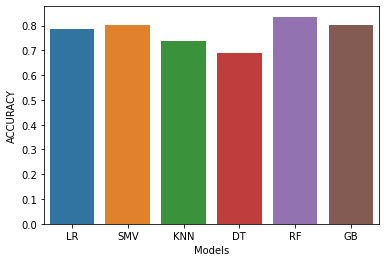

In [ ]:
sns.barplot(final_data['Models'], final_data['ACCURACY'])

# Training the entire Dataset using Random Forest

In [ ]:
x = data.drop('target', axis=1)
y=data['target']

In [ ]:
x.shape

(302, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

#Prediction on New Data

In [ ]:
import pandas as pd

In [ ]:
new_data = pd.DataFrame({
    'age': 52,
    'sex': 1,
    'cp': 0,
    'trestbps': 125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
}, index=[0])

In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [ ]:
#performing a predicition to check if new_data has heart disease
p = rf.predict(new_data)
if p == 0:
    print ("No Heart Disease")
else:
    print("Disease")
    

No Heart Disease


## Saving Model using Joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(rf, 'Chukwuemeka_Model_for_heart')

['Chukwuemeka_Model_for_heart']

In [ ]:
model = joblib.load('Chukwuemeka_Model_for_heart')

In [ ]:
model.predict(new_data)

array([0])

In [ ]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('Chukwuemeka_Model_for_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

TclError: ignored